In [ ]:
#oracle will flip the sign of the input if the input is a winner
# change states with unitary matrics
# controlled Z to flip state
# grovers difusion;

In [ ]:
#--------------------------------------------------------------------

In [ ]:
# dealing with noise
# measurement error mitigation 

In [ ]:
#ignis : allows us to mitgaet and understand the of error

In [3]:
import numpy as np
from qiskit import BasicAer
from qiskit.visualization import plot_histogram
%config InlineBackend.figure_format = 'svg'
from qiskit.aqua import QuantumInstance#, run_algorithm
from qiskit.aqua.algorithms import Grover
from qiskit.aqua.components.oracles import LogicalExpressionOracle, TruthTableOracle


In [4]:
#Input function encoding
input_3sat = '''
c example DIMACS-CNF 3-SAT
p cnf 3 5
-1 -2 -3 0
1 -2 3 0
1 2 -3 0
1 -2 -3 0
-1 2 3 0
'''

In [5]:
oracle = LogicalExpressionOracle(input_3sat)
grover = Grover(oracle)
backend = BasicAer.get_backend('qasm_simulator')
quantum_instance = QuantumInstance(backend, shots = 1024)
result = grover.run(quantum_instance)
print(result['result'])

[1, -2, 3]


/Users/ezi/opt/anaconda3/lib/python3.7/site-packages/qiskit/aqua/algorithms/amplitude_amplifiers/grover.py:608: DeprecationWarning: result deprecated, use assignment property.
  warnings.warn('result deprecated, use assignment property.', DeprecationWarning)


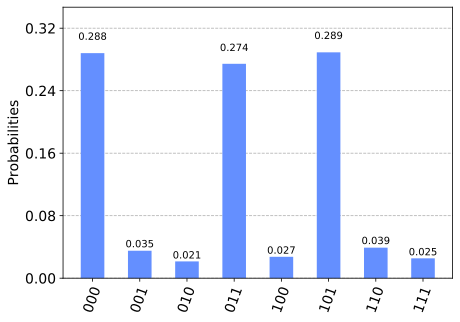

In [6]:
plot_histogram(result['measurement'])

In [7]:
# Load our saved IBMQ accounts and get the ibmq_16_melbourne backend
from qiskit import IBMQ
IBMQ.load_account()
provider = IBMQ.get_provider(hub='ibm-q')
real_dev = provider.get_backend('ibmq_16_melbourne')

/Users/ezi/opt/anaconda3/lib/python3.7/site-packages/qiskit/providers/ibmq/ibmqfactory.py:192: UserWarning: Timestamps in IBMQ backend properties, jobs, and job results are all now in local time instead of UTC.
  warnings.warn('Timestamps in IBMQ backend properties, jobs, and job results '


In [9]:
from qiskit import execute

In [10]:

job = execute(circuit, backend = real_dev, shots=8192)
print(job.job_id())
from qiskit.tools.monitor import job_monitor
job_monitor(job)

NameError: name 'circuit' is not defined

In [2]:
nqubits=3 # no. of qubits
circuit= QuantumCircuit(nqubits,nqubits)
circuit.h(0)
circuit.cx(0,1)
circuit.cx(1,2)
circuit.measure([0,1,2],[0,1,2])


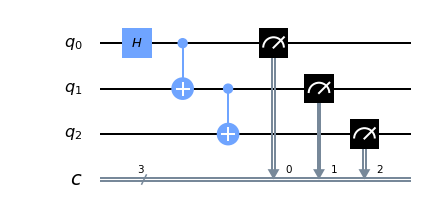

In [3]:
%matplotlib inline
circuit.draw(output='mpl')

In [4]:
simulator = Aer.get_backend('qasm_simulator')
sim_result = execute(circuit, backend = simulator, shots= 20000).result()

In [5]:
from qiskit.visualization import plot_histogram

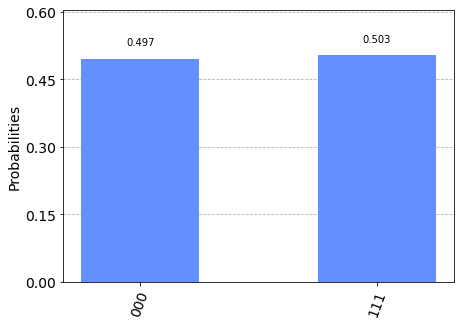

In [6]:
plot_histogram(sim_result.get_counts(circuit))

In [7]:
IBMQ.load_account()
provider = IBMQ.get_provider(hub= 'ibm-q')
device = provider.get_backend('ibmqx2')

In [ ]:
job = execute(circuit, backend = device, shots = 1024)
print(job.job_id())
from qiskit.tools.monitor import job_monitor
job_monitor(job)

603829c16ccc8fc98158d84f
Job Status: job is queued (7)     

In [2]:
device_result = job.result()
plot_histogram(device_result.get_counts(circuit))

NameError: name 'job' is not defined

In [ ]:
from qiskit.ignis.mitigation.measurement import (complete_meas_cal, CompleteMeasFitter)

In [1]:
cal_circuits, state_labels = complete_meas_cal(qr = circuit.qregs[0], circlabel= 'measerrormitigational')

NameError: name 'complete_meas_cal' is not defined

In [ ]:
# gives a series of calibrtion erroes to run

In [ ]:
len(cal_circuits) # how many circuits

In [ ]:
cal_job =execute(cal_circuits,
                 backend= device,
                 shots= 1024,
                 optimization_level =0 # makes sure cuircuits aerenot changed as we transfer them from here to real device
                
print(cal_job.job_id())
job_monitor(job)
cal_result = cal_jib.result()

In [ ]:
plot_histogram(
cal_result.get_counts(cal_circuits[3])
)

In [ ]:
meas_fitter =CompleteMeasFitter(cal_results, state_labels)

In [ ]:
meas_fitter.plot_calibration()

In [ ]:
meas_filter = meas_fitter.filter

In [ ]:
mitigated_result = meas_filter.apply(device_result)

In [ ]:
device_counts = device_result.get_counts(circuit)
mitgated_counts = mitgated_result.get_counts(circuit)
plot_histogram([device_counts, mitgated_counts], legend=['device, noisy', 'device, mitigated'])